In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
portrait_tg = pd.read_csv('/Users/macbook/Downloads/Topface/Data/portrait_TG.csv', sep=';')
portrait_cg1 = pd.read_csv('/Users/macbook/Downloads/Topface/Data/portrait_CG1.csv', sep = ';')
portrait_cg2 = pd.read_csv('/Users/macbook/Downloads/Topface/Data/portrait_CG2.csv', sep = ';')
payments_tg = pd.read_csv('/Users/macbook/Downloads/Topface/Data/payments_TG.csv', sep=';', parse_dates = [1,2])
payments_cg1 = pd.read_csv('/Users/macbook/Downloads/Topface/Data/payments_CG1.csv', sep = ';', parse_dates = [1,2])
payments_cg2 = pd.read_csv('/Users/macbook/Downloads/Topface/Data/payments_CG2.csv', sep = ';', parse_dates = [1,2])

#### Посмотрим на данные:

In [4]:
portrait_tg

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
0,892309896,27,685,NaN,US,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,DE,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,IL,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,US,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,FR,NaN,1,24,30,1,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,891078639,17,895,NaN,US,"1,2,3,4,5",1,16,20,96,NaN,NaN,0
4304,891188733,27,866,NaN,US,"1,2,3",1,18,41,30,NaN,NaN,0
4305,891293718,48,0,NaN,AR,NaN,1,47,51,10,NaN,NaN,0
4306,891192357,32,0,NaN,AU,NaN,1,16,49,0,NaN,NaN,0


In [5]:
portrait_tg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
user_id                    4308 non-null int64
age                        4308 non-null int64
attraction_distribution    4308 non-null int64
coins                      49 non-null float64
country                    4308 non-null object
retention_days             2978 non-null object
sex                        4308 non-null int64
user_dating.age_start      4308 non-null int64
user_dating.age_end        4308 non-null int64
view_count                 4308 non-null int64
was_special                408 non-null float64
is_special                 157 non-null float64
total_revenue              4308 non-null int64
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


In [6]:
payments_tg

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
0,891345942,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,TrialVipPopup,IT,trial
1,892054251,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,TrialVipPopup,US,trial
2,892236423,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,Menu,US,other
3,892236423,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,Menu,US,other
4,892168170,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,TrialVipPopup,US,trial
...,...,...,...,...,...,...,...,...
268,891419625,2017-04-11 05:58:00,2017-11-11 08:33:00,14352,147,TrialVipPopup,IL,trial
269,891447105,2017-03-11 17:05:00,2017-11-11 04:23:00,7319,147,Fans,GB,prem
270,891497073,2017-02-11 15:33:00,2017-05-11 04:06:00,2730,67,EmptyLikes,US,other
271,891406224,2017-04-11 12:56:00,2017-04-11 13:35:00,2743,67,EmptyLikes,IL,other


In [7]:
payments_tg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
user_id               273 non-null int64
registration_date     273 non-null datetime64[ns]
payment_date          273 non-null datetime64[ns]
revenue               273 non-null int64
payment_service_id    273 non-null int64
place                 273 non-null object
country               273 non-null object
product_type          273 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 17.2+ KB


#### Для удобства анализа объединим данные по пользователям и платежам

In [8]:
portrait_tg['group'] = 'tg'
portrait_cg1['group'] = 'cg1'
portrait_cg2['group'] = 'cg2'
portrait = portrait_tg.append(portrait_cg1.append(portrait_cg2, ignore_index = True), ignore_index = True)

In [9]:
portrait = portrait_tg.append(portrait_cg1.append(portrait_cg2, ignore_index = True), ignore_index = True)

In [10]:
# В таблице платежей CG1 считаны пустые строки, удалим их:
# (непустые строки пропусков данных не имеют)
payments_cg1.dropna(inplace = True)

In [11]:
#В таблице CG1 есть 3 "странные" записи, с временными характеристиками, явно выпадающими из отрезка эксперимента
print('payments_tg: c %s до %s (%s)'% (payments_tg.payment_date.min(), payments_tg.payment_date.max(), payments_tg.payment_date.max() - payments_tg.payment_date.min()))
print('payments_cg1: c %s до %s (%s)'% (payments_cg1.payment_date.min(), payments_tg.payment_date.max(), payments_cg1.payment_date.max() - payments_cg1.payment_date.min()))
print('payments_cg2: c %s до %s (%s)'% (payments_cg2.payment_date.min(), payments_tg.payment_date.max(), payments_cg2.payment_date.max() - payments_cg2.payment_date.min()))

payments_tg: c 2017-01-11 04:37:00 до 2017-12-11 22:06:00 (334 days 17:29:00)
payments_cg1: c 2016-12-14 16:16:00 до 2017-12-11 22:06:00 (362 days 05:41:00)
payments_cg2: c 2017-01-11 05:34:00 до 2017-12-11 22:06:00 (334 days 17:54:00)


In [12]:
payments_cg1[payments_cg1.payment_date < '2017-01-11']

,user_id,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
65,960936960.0,2015-01-19 11:49:00,2016-12-14 17:30:00,26.0,0.0,REFUND Деньги от FB,RU,other
101,960936960.0,2015-01-19 11:49:00,2016-12-14 17:35:00,637.0,0.0,REFUND Деньги от Ninja,RU,other
224,960936960.0,2015-01-19 11:49:00,2016-12-14 16:16:00,143.0,0.0,REFUND Деньги от PaymentWall (mobile),RU,other


In [13]:
#### Удалим их:
payments_cg1.drop(payments_cg1[payments_cg1.payment_date < '2017-01-11'].index, inplace = True)

In [14]:
payments_tg['group'] = 'tg'
payments_cg1['group'] = 'cg1'
payments_cg2['group'] = 'cg2'
payments = payments_tg.append(payments_cg1.append(payments_cg2, ignore_index = True), ignore_index = True)

In [15]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 9 columns):
user_id               975 non-null float64
registration_date     975 non-null datetime64[ns]
payment_date          975 non-null datetime64[ns]
revenue               975 non-null float64
payment_service_id    975 non-null float64
place                 975 non-null object
country               975 non-null object
product_type          975 non-null object
group                 975 non-null object
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 68.7+ KB


In [16]:
#### Все равно наблюдается (на глаз) некое различие в результатах в контрольных группах 1 и 2
#### Странно, проверим их статистически позднее

Text(0.5, 1.0, '(other than prem)')

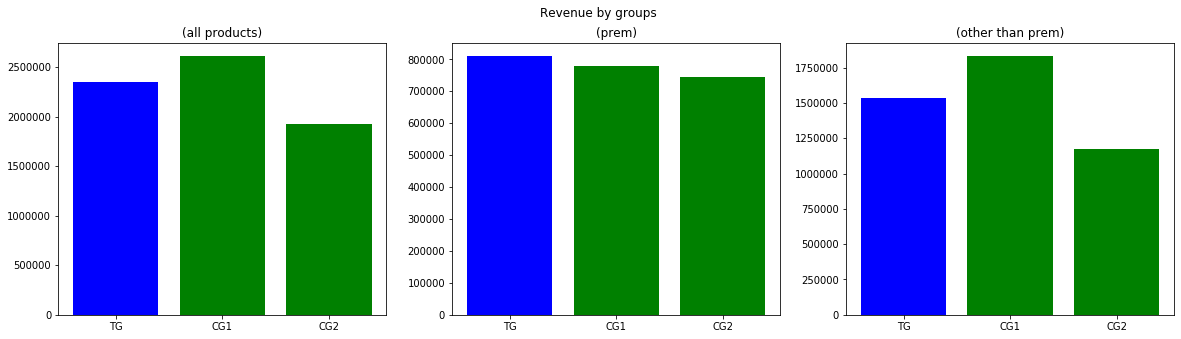

In [17]:
names = ['TG', 'CG1', 'CG2']
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
fig.suptitle('Revenue by groups')
ax1, ax2, ax3 = axes
ax1.bar(names, [payments_tg.revenue.sum(), payments_cg1.revenue.sum(), payments_cg2.revenue.sum()],\
        color = ['b', 'g', 'g'])
ax1.set_title('(all products)')
ax2.bar(names, [payments_tg[payments_tg.product_type == 'prem'].revenue.sum(),\
                payments_cg1[payments_cg1.product_type == 'prem'].revenue.sum(),\
                payments_cg2[payments_cg2.product_type == 'prem'].revenue.sum()],\
       color = ['b', 'g', 'g'])
ax2.set_title('(prem)')
ax3.bar(names, [payments_tg[payments_tg.product_type != 'prem'].revenue.sum(),\
                payments_cg1[payments_cg1.product_type != 'prem'].revenue.sum(),\
                payments_cg2[payments_cg2.product_type != 'prem'].revenue.sum()],\
       color = ['b', 'g', 'g'])
ax3.set_title('(other than prem)')

In [18]:
comparison= pd.DataFrame()

In [19]:
comparison['group']= pd.Series(['tg', 'cg1', 'cg2', 'CG combined']).transpose()

In [20]:
a = portrait[portrait.group == 'cg1'].user_id.nunique()
b = portrait[portrait.group == 'cg2'].user_id.nunique()
comparison['N'] = pd.Series([portrait[portrait.group == 'tg'].user_id.nunique(), a, b, a+b]).transpose()

In [21]:
a = payments[payments.group == 'cg1'].user_id.nunique()
b = payments[payments.group == 'cg2'].user_id.nunique()
comparison['N_users_payed'] = pd.Series([payments[payments.group == 'tg'].user_id.nunique(), a, b, a+b]).transpose()

In [22]:
comparison['Conv_ratio'] = comparison['N_users_payed'] / comparison['N']

In [23]:
a = payments[payments.group == 'cg1'].revenue.sum()
b = payments[payments.group == 'cg2'].revenue.sum()
comparison['Revenue_all'] = pd.Series([payments[payments.group == 'tg'].revenue.sum(), a, b, a+b]).transpose()

In [24]:
comparison['Revenue_mean_by_group'] = comparison['Revenue_all'] / comparison['N']

In [25]:
comparison

,group,N,N_users_payed,Conv_ratio,Revenue_all,Revenue_mean_by_group
0,tg,4308,146,0.033890,2344901.0,544.313138
1,cg1,4340,192,0.044240,2611505.0,601.729263
2,cg2,4264,187,0.043856,1920438.0,450.384146
3,CG combined,8604,379,0.044049,4531943.0,526.725128


#### Проверим распределения на нормальность

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fb72ad190>]],
      dtype=object)

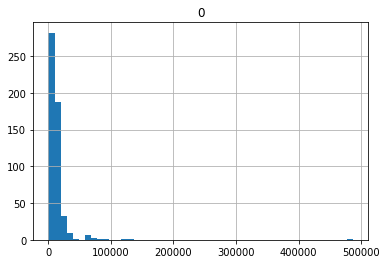

In [26]:
pd.DataFrame(payments.groupby('user_id').revenue.sum().values).hist(bins = 50)

(0.5640736818313599, 4.947132531180847e-19)

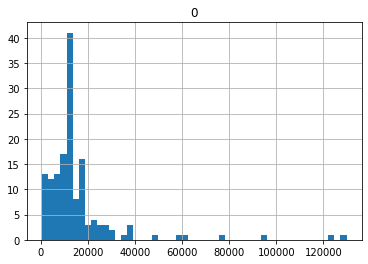

In [27]:
pd.DataFrame(payments_tg.groupby('user_id').revenue.sum().values).hist(bins = 50)
scipy.stats.shapiro(payments_tg.groupby('user_id').revenue.sum().values)

In [28]:
#### совсем не похоже на нормальное распределение

In [29]:
scipy.stats.shapiro(payments.groupby('user_id').revenue.sum().values)

(0.260029673576355, 3.1337237557695884e-41)

In [30]:
scipy.stats.shapiro(payments_tg.groupby('user_id').revenue.sum().values)

(0.5640736818313599, 4.947132531180847e-19)

#### p < 0.05 => распределения отличаются от нормального

#### Критерий Краскела — Уоллиса (предназначен для проверки равенства медиан нескольких выборок)

In [31]:
scipy.stats.kruskal(payments_tg.groupby('user_id').revenue.sum().values,
                     payments_cg1.groupby('user_id').revenue.sum().values,
                     payments_cg2.groupby('user_id').revenue.sum().values)

KruskalResult(statistic=21.32445209500725, pvalue=2.3412838141931813e-05)

In [32]:
scipy.stats.kruskal(payments_tg.groupby('user_id').revenue.sum().values,
                     payments_cg1.groupby('user_id').revenue.sum().values)

KruskalResult(statistic=12.56666047356561, pvalue=0.00039268967590893006)

In [33]:
scipy.stats.kruskal(payments_tg.groupby('user_id').revenue.sum().values,
                     payments_cg2.groupby('user_id').revenue.sum().values)

KruskalResult(statistic=19.366703500116355, pvalue=1.0787154287283003e-05)

##### p < 0,05 => медианы тестовой и контрольных выборок не равны

In [34]:
# проведем этот тест и для контрольных групп (ранее на глаз между ними было замечено некоторое различие)
scipy.stats.kruskal(payments_cg1.groupby('user_id').revenue.sum().values,
                     payments_cg2.groupby('user_id').revenue.sum().values)

KruskalResult(statistic=1.2957936369683472, pvalue=0.254982996058994)

In [35]:
#### нет, с контрольными группами всё в порядке (p-value = 0,25)

#### U-тест Манна — Уитни

In [36]:
scipy.stats.mannwhitneyu(payments_tg.groupby('user_id').revenue.sum().values,\
                         payments_cg1.groupby('user_id').revenue.sum().values)

MannwhitneyuResult(statistic=10862.5, pvalue=0.0001967639346526705)

In [37]:
scipy.stats.mannwhitneyu(payments_tg.groupby('user_id').revenue.sum().values,\
                         payments_cg2.groupby('user_id').revenue.sum().values)

MannwhitneyuResult(statistic=9816.5, pvalue=5.4078602084577595e-06)

##### различия между значениями выручки по пользователям в тестовой и контрольных выборках достоверны

In [38]:
# сравним для интереса и контрольные выборки:
scipy.stats.mannwhitneyu(payments_cg1.groupby('user_id').revenue.sum().values,\
                         payments_cg2.groupby('user_id').revenue.sum().values)

MannwhitneyuResult(statistic=16739.0, pvalue=0.1275894527007122)

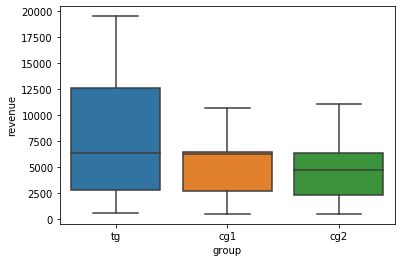

In [39]:
sns.boxplot(x='group', y='revenue', data=payments, orient="v", showfliers = False)

Text(0.5, 0.98, 'Доля пользователей, приобретающих платные услуги')

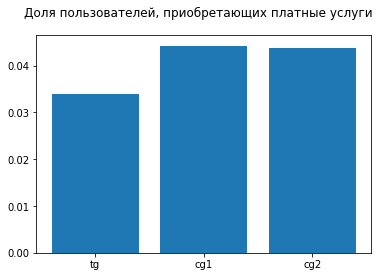

In [40]:
data = comparison[:3]
plt.bar(x = data.group, height = data.Conv_ratio)
plt.suptitle('Доля пользователей, приобретающих платные услуги')

In [41]:
print('Выручка в среднем с пользователя из тестовой группы: ', payments_tg.revenue.sum() / portrait_tg.user_id.nunique())
print('Выручка в среднем с пользователей из контрольных групп: ', \
      (payments_cg1.revenue.sum() + payments_cg2.revenue.sum())/ (portrait_cg1.user_id.nunique() + portrait_cg2.user_id.nunique()))

Выручка в среднем с пользователя из тестовой группы:  544.3131383472609
Выручка в среднем с пользователей из контрольных групп:  526.7251278475128


In [42]:
print('Выручка в среднем с платящего пользователя из тестовой группы: ', payments_tg.revenue.sum() / payments_tg.user_id.nunique())
print('Выручка в среднем с платящего пользователей из контрольный групп: ', \
      (payments_cg1.revenue.sum() + payments_cg2.revenue.sum())/ (payments_cg1.user_id.nunique() + payments_cg2.user_id.nunique()))

Выручка в среднем с платящего пользователя из тестовой группы:  16060.965753424658
Выручка в среднем с платящего пользователей из контрольный групп:  11957.633245382585


## Результаты эксперимента положительные - средняя выручка с пользователя изменилась (возросла на 3,3%)
### Пользователи стали меньше приобретать платные услуги (доля платных пользователей упала с 4,4% в контрольных группах до 3,4% в тестовой группе ), но те, кто платит - стали платить больше (в среднем на 34%).

In [43]:
#### Посмотрим, как реагируют пользователи разных возрастных групп на повышение стоимости премиум-подписки

In [44]:
portrait_tg.age.describe()

count    4308.000000
mean       31.889276
std        10.245287
min        16.000000
25%        25.000000
50%        30.000000
75%        38.000000
max        99.000000
Name: age, dtype: float64

In [45]:
portrait_cg = portrait_cg1.append(portrait_cg2, ignore_index = True)

In [46]:
portrait_tg['age_quartile'] = 0
portrait_cg['age_quartile'] = 0

In [47]:
for i in range(0, len(portrait_tg.age)):
    if portrait_tg.age[i] in range(0, 25): portrait_tg['age_quartile'][i] = 1
    elif portrait_tg.age[i] in range(25, 30): portrait_tg['age_quartile'][i] = 2
    elif portrait_tg.age[i] in range(30, 38): portrait_tg['age_quartile'][i] = 3
    else: portrait_tg['age_quartile'][i] = 4

for i in range(0, len(portrait_cg.age)):
    if portrait_cg.age[i] in range(0, 25): portrait_cg['age_quartile'][i] = 1
    elif portrait_cg.age[i] in range(25, 30): portrait_cg['age_quartile'][i] = 2
    elif portrait_cg.age[i] in range(30, 38): portrait_cg['age_quartile'][i] = 3
    else: portrait_cg['age_quartile'][i] = 4
    

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

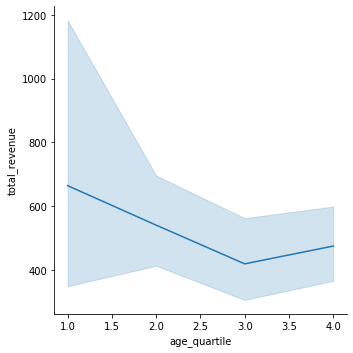

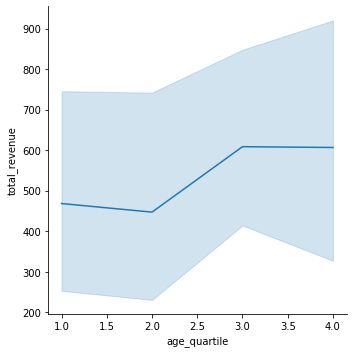

In [48]:
sns.relplot(data = portrait_cg, x = 'age_quartile', y = 'total_revenue', kind = 'line')
sns.relplot(data = portrait_tg, x = 'age_quartile', y = 'total_revenue', kind = 'line')

In [49]:
print('Контрольные группы:')
for i in range(1,5):
    print('Средняя выручка с пользователя из %s-го возрастного квартиля'%i,portrait_cg[portrait_cg.age_quartile == i].total_revenue.sum() / portrait_cg[portrait_cg.age_quartile == i].user_id.nunique())

Контрольные группы:
Средняя выручка с пользователя из 1-го возрастного квартиля 664.4343575418994
Средняя выручка с пользователя из 2-го возрастного квартиля 540.5987780040733
Средняя выручка с пользователя из 3-го возрастного квартиля 419.21550530687585
Средняя выручка с пользователя из 4-го возрастного квартиля 474.97806451612905


In [50]:
print('Тестовая группа:')
for i in range(1,5):
    print('Средняя выручка с пользователя из %s-го возрастного квартиля'%i,portrait_tg[portrait_tg.age_quartile == i].total_revenue.sum() / portrait_tg[portrait_tg.age_quartile == i].user_id.nunique())

Тестовая группа:
Средняя выручка с пользователя из 1-го возрастного квартиля 468.52389878163075
Средняя выручка с пользователя из 2-го возрастного квартиля 447.30864197530866
Средняя выручка с пользователя из 3-го возрастного квартиля 608.798877455566
Средняя выручка с пользователя из 4-го возрастного квартиля 606.864164432529


### более молодая половина пользователей стала тратить гораздо меньше,
### в то время как более взрослая - намного больше
### возможно, повышать цену целесообразнее было бы только для более возрастных групп пользователей

In [51]:
portrait_tg.head(100
    )

,user_id,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,group,age_quartile
0,892309896,27,685,NaN,US,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0,tg,2
1,892044516,27,0,NaN,DE,NaN,1,24,30,0,NaN,NaN,0,tg,2
2,892185708,45,44,NaN,IL,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0,tg,4
3,892130292,32,0,NaN,US,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0,tg,3
4,891406035,27,1000,NaN,FR,NaN,1,24,30,1,1.0,NaN,0,tg,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,891448611,23,0,NaN,IT,NaN,1,20,26,4,NaN,NaN,0,tg,1
96,891381948,22,500,NaN,IT,NaN,1,19,25,4,NaN,NaN,0,tg,1
97,891761364,24,0,NaN,CL,"1,3,4,5,7,8,9,10,12,13,14,15,16,17",1,20,29,2,NaN,NaN,0,tg,1
98,891152664,38,550,NaN,US,"1,2,3,4",0,40,99,656,NaN,NaN,0,tg,4
